In [2]:
import os
import sys
import pylab as p
import pylab as pl
import matplotlib as mpl
import pylab as pl
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker
sns.reset_defaults()
import warnings
warnings.filterwarnings('ignore')

# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42

In [4]:
df = pd.read_csv('data/EII13-All-QC.csv')
fig, ax = plt.subplots()
fig.set_size_inches(5,4)
print(df.loc[:, ["Residue", "BondVector", "1H-RDC", "13C-RDC"]])
mk_color_dict = {'h1': 'red', 'h2':'blue', 'bulge':'orange', 'loop':'green'}
mk_dict = {
    'C6H6':'s', 'C8H8':'s', 'C2H2':'s', # aromatic
    "C1'H1'": 'o', "C4'H4'": 'o', # sugars
    "C5H5": 'D', #c5's
    "N1H1": '^', "N3H3": '^' # iminos
}
col_dict = {}
for i in range(17,23):
    col_dict[i] = "red"
for i in range(40,46):
    col_dict[i] = "red"
for i in range(26,30):
    col_dict[i] = "blue"
for i in range(36,40):
    col_dict[i] = "blue"
for i in range(23,26):
    col_dict[i] = "orange"
for i in range(30,36):
    col_dict[i] = "green"


    fill_dict = {}
for i in range(17,23):
    fill_dict[i] = "full"
for i in range(40,46):
    fill_dict[i] = "none"
for i in range(26,30):
    fill_dict[i] = "full"
for i in range(36,40):
    fill_dict[i] = "none"
for i in range(23,26):
    fill_dict[i] = "full"
for i in range(30,36):
    fill_dict[i] = "full"
  
for idx, row in df.dropna(subset=["1H-RDC", "13C-RDC"]).iterrows():
    res_no = int(row.loc['Residue'][1:])
    bond_vector = row.loc['BondVector']
    ax.plot(row['1H-RDC'], row['13C-RDC'], marker=mk_dict[bond_vector], color=col_dict[res_no], markersize=15)

plt.rcParams['font.family'] = 'Arial'
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim([-40, 60])
ax.set_xlim([-40, 60])
ax.plot([-50, 60], [-50, 60], ls='--', color='k', lw=2)

x = df.dropna(subset=["1H-RDC", "13C-RDC"])['1H-RDC']
y = df.dropna(subset=["1H-RDC", "13C-RDC"])['13C-RDC']
j_rmsd = np.sqrt(np.mean((x-y)**2))
j_r2 = np.corrcoef(x,y)[0,1]
print("D Correlation")
print(j_rmsd)
print(j_r2)

ax.set_xlabel(r"$^{1}H$ RDC (Hz)", fontsize=20)
ax.set_ylabel(r"$^{13}C$ RDC (Hz)", fontsize=20)

import matplotlib.lines as mlines


aro = mlines.Line2D([], [], color='black', marker='s',markersize=10, label='C8H8/C6H6/C2H2', ls="")
sug = mlines.Line2D([], [], color='black', marker='o',markersize=10, label="C1'H1'/C4'H4'", ls="")
c5 = mlines.Line2D([], [], color='black', marker='D',markersize=10, label='C5H5', ls="")
imino = mlines.Line2D([], [], color='black', marker='^',markersize=10, label='N1H1/N3H3', ls="")
ax.tick_params(width=2,length=6)


#ax.legend(handles=[aro, sug, c5, imino], prop={'size': 15}, bbox_to_anchor=(1.5, 0.5), edgecolor="k")
plt.savefig("EII13-1H-vs-13C-RDC.pdf")


   Residue BondVector  1H-RDC  13C-RDC
0      G28       C8H8  35.862   41.698
1      G26       C8H8  36.243   40.484
2      G36       C8H8  34.417   36.063
3      G34       C8H8  31.024   29.960
4      G33       C8H8  24.914   24.363
5      G32       C8H8   3.061    3.041
6      C29       C6H6  28.241      NaN
7      C30       C6H6  24.275   34.147
8      G32     C1'H1'   4.401    3.789
9      G33     C1'H1'   1.792    0.599
10     G34     C1'H1'  12.173   14.036
11     C30     C1'H1'   9.849    9.958
12     G36     C1'H1' -52.122      NaN
13     C37     C1'H1' -40.465      NaN
14     C29     C1'H1' -17.092  -18.612
15     G28       N1H1 -18.134  -19.589
16     G36       N1H1 -17.130  -17.868
17     G26       N1H1 -17.686  -16.522
18     C39       C5H5  30.872      NaN
19     C30       C5H5  32.184      NaN
20     C37       C5H5  19.368      NaN
21     C29       C5H5  28.838      NaN
D Correlation
3.3191784324839575
0.9928007215901059


In [6]:
df = pd.read_csv('data/EI22-All-QC.csv')
# Plot RDC 1H vs 13C Correlation:

fig, ax = plt.subplots()
fig.set_size_inches(5,4)
print(df.loc[:, ["Residue", "BondVector", "1H-RDC", "13C-RDC"]])
mk_color_dict = {'h1': 'red', 'h2':'blue', 'bulge':'orange', 'loop':'green'}
mk_dict = {
    'C6H6':'s', 'C8H8':'s', 'C2H2':'s', # aromatic
    "C1'H1'": 'o', "C4'H4'": 'o', # sugars
    "C5H5": 'D', #c5's
    "N1H1": '^', "N3H3": '^' # iminos
}
col_dict = {}
for i in range(17,23):
    col_dict[i] = "red"
for i in range(40,46):
    col_dict[i] = "red"
for i in range(26,30):
    col_dict[i] = "blue"
for i in range(36,40):
    col_dict[i] = "blue"
for i in range(23,26):
    col_dict[i] = "orange"
for i in range(30,36):
    col_dict[i] = "green"

    fill_dict = {}
for i in range(17,23):
    fill_dict[i] = "full"
for i in range(40,46):
    fill_dict[i] = "none"
for i in range(26,30):
    fill_dict[i] = "full"
for i in range(36,40):
    fill_dict[i] = "none"
for i in range(23,26):
    fill_dict[i] = "full"
for i in range(30,36):
    fill_dict[i] = "full"
  
for idx, row in df.dropna(subset=["1H-RDC", "13C-RDC"]).iterrows():
    res_no = int(row.loc['Residue'][1:])
    bond_vector = row.loc['BondVector']
    ax.plot(row['1H-RDC'], row['13C-RDC'], marker=mk_dict[bond_vector], color=col_dict[res_no], markersize=15)

plt.rcParams['font.family'] = 'Arial'
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim([-40, 40])
ax.set_xlim([-40, 40])
ax.plot([-40, 40], [-40, 40], ls='--', color='k', lw=2)

x = df.dropna(subset=["1H-RDC", "13C-RDC"])['1H-RDC']
y = df.dropna(subset=["1H-RDC", "13C-RDC"])['13C-RDC']
j_rmsd = np.sqrt(np.mean((x-y)**2))
j_r2 = np.corrcoef(x,y)[0,1]
print("D Correlation")
print(j_rmsd)
print(j_r2)

ax.set_xlabel(r"$^{1}H$ RDC (Hz)", fontsize=20)
ax.set_ylabel(r"$^{13}C$ RDC (Hz)", fontsize=20)

import matplotlib.lines as mlines


aro = mlines.Line2D([], [], color='black', marker='s',markersize=10, label='C8H8/C6H6/C2H2', ls="")
sug = mlines.Line2D([], [], color='black', marker='o',markersize=10, label="C1'H1'/C4'H4'", ls="")
c5 = mlines.Line2D([], [], color='black', marker='D',markersize=10, label='C5H5', ls="")
imino = mlines.Line2D([], [], color='black', marker='^',markersize=10, label='N1H1/N3H3', ls="")
ax.tick_params(width=2,length=6)


#ax.legend(handles=[aro, sug, c5, imino], prop={'size': 15}, bbox_to_anchor=(1.5, 0.5), edgecolor="k")
plt.savefig("EI22-1H-vs-13C-RDC.pdf")

   Residue BondVector  1H-RDC  13C-RDC
0      G18     C1'H1'     NaN      NaN
1      G21     C1'H1'     NaN      NaN
2      G28     C1'H1'     NaN      NaN
3      C29     C1'H1'  -0.204   -4.710
4      G32     C1'H1'   5.561    3.504
5      G33     C1'H1'   4.131    5.471
6      G34     C1'H1'     NaN      NaN
7      G36     C1'H1'  -3.151      NaN
8      C37     C1'H1'   7.180   10.055
9      C39     C1'H1'   7.090    6.474
10     C44     C1'H1' -19.433      NaN
11     A20     C1'H1' -22.678      NaN
12     A22     C1'H1'  -5.844      NaN
13     U23     C1'H1'   3.646    1.836
14     A27     C1'H1' -35.494      NaN
15     U31     C1'H1' -13.610  -17.220
16     A35     C1'H1'  -3.887      NaN
17     U38     C1'H1'  11.230   10.799
18     U40     C1'H1'  -6.899   -8.186
19     U42     C1'H1'     NaN      NaN
20     C19       C6H6  26.964      NaN
21     G21       C8H8  28.622      NaN
22     C24       C6H6  -3.937   -2.734
23     G26       C8H8  17.573   16.377
24     G28       C8H8  24

    Residue BondVector  1H-RDC  13C-RDC
0        28       C8H8  17.356  15.6000
1        26       C8H8  12.332  12.6560
2        36       C8H8   8.880  10.2730
3        25       C8H8   1.900   1.1950
4        34       C8H8   7.680   7.3441
5        27       C8H8  15.429  14.4360
6        33       C8H8   3.361   5.3710
7        32       C8H8  -1.120  -1.1510
8        29       C6H6  10.523  11.1090
9        35       C8H8   2.998   3.4490
10       38       C6H6  16.384      NaN
11       31       C6H6  -4.255  -3.1440
12       40       C6H6   9.486      NaN
13       32     C1'H1'  -1.403   0.4290
14       33     C1'H1'  -0.832  -1.5520
15       34     C1'H1'   9.148   8.4580
16       35     C1'H1'  -6.174      NaN
17       31     C1'H1'  -6.102      NaN
18       30     C1'H1'  10.449      NaN
19       26     C1'H1'  -3.693  -1.8470
20       28     C1'H1'  -0.732  -1.2130
21       36     C1'H1' -21.036 -22.1030
22       29     C1'H1'  12.991  11.3480
23       39       C5H5  15.904  14.5050


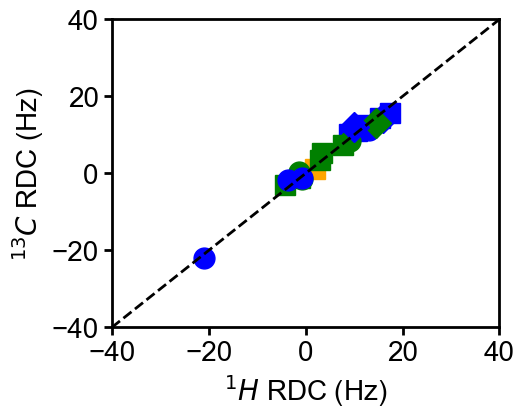

In [7]:
df = pd.read_csv('data/EII3-All-QC.csv')
# Plot RDC 1H vs 13C Correlation:

fig, ax = plt.subplots()
fig.set_size_inches(5,4)
print(df.loc[:, ["Residue", "BondVector", "1H-RDC", "13C-RDC"]])
mk_color_dict = {'h1': 'red', 'h2':'blue', 'bulge':'orange', 'loop':'green'}
mk_dict = {
    'C6H6':'s', 'C8H8':'s', 'C2H2':'s', # aromatic
    "C1'H1'": 'o', "C4'H4'": 'o', # sugars
    "C5H5": 'D', #c5's
    "N1H1": '^', "N3H3": '^' # iminos
}
col_dict = {}
for i in range(17,23):
    col_dict[i] = "red"
for i in range(40,46):
    col_dict[i] = "red"
for i in range(26,30):
    col_dict[i] = "blue"
for i in range(36,40):
    col_dict[i] = "blue"
for i in range(23,26):
    col_dict[i] = "orange"
for i in range(30,36):
    col_dict[i] = "green"

    fill_dict = {}
for i in range(17,23):
    fill_dict[i] = "full"
for i in range(40,46):
    fill_dict[i] = "none"
for i in range(26,30):
    fill_dict[i] = "full"
for i in range(36,40):
    fill_dict[i] = "none"
for i in range(23,26):
    fill_dict[i] = "full"
for i in range(30,36):
    fill_dict[i] = "full"
  
for idx, row in df.dropna(subset=["1H-RDC", "13C-RDC"]).iterrows():
    res_no = int(row.loc['Residue'])
    bond_vector = row.loc['BondVector']
    ax.plot(row['1H-RDC'], row['13C-RDC'], marker=mk_dict[bond_vector], color=col_dict[res_no], markersize=15)

plt.rcParams['font.family'] = 'Arial'
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim([-40, 40])
ax.set_xlim([-40, 40])
ax.plot([-40, 40], [-40, 40], ls='--', color='k', lw=2)

x = df.dropna(subset=["1H-RDC", "13C-RDC"])['1H-RDC']
y = df.dropna(subset=["1H-RDC", "13C-RDC"])['13C-RDC']
j_rmsd = np.sqrt(np.mean((x-y)**2))
j_r2 = np.corrcoef(x,y)[0,1]
print("D Correlation")
print(j_rmsd)
print(j_r2)

ax.set_xlabel(r"$^{1}H$ RDC (Hz)", fontsize=20)
ax.set_ylabel(r"$^{13}C$ RDC (Hz)", fontsize=20)

import matplotlib.lines as mlines


aro = mlines.Line2D([], [], color='black', marker='s',markersize=10, label='C8H8/C6H6/C2H2', ls="")
sug = mlines.Line2D([], [], color='black', marker='o',markersize=10, label="C1'H1'/C4'H4'", ls="")
c5 = mlines.Line2D([], [], color='black', marker='D',markersize=10, label='C5H5', ls="")
imino = mlines.Line2D([], [], color='black', marker='^',markersize=10, label='N1H1/N3H3', ls="")
ax.tick_params(width=2,length=6)


#ax.legend(handles=[aro, sug, c5, imino], prop={'size': 15}, bbox_to_anchor=(1.5, 0.5), edgecolor="k")
plt.savefig("EII3-1H-vs-13C-RDC.pdf")
plt.show()

